In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from shutil import copyfile

%matplotlib inline

In [2]:
df = pd.DataFrame()
for folder in glob.glob('*_input_*/'):
    sc_file = folder + "score.sc"
    if os.path.exists(sc_file):
        dsc = pd.read_csv(sc_file, sep='\s+', header=1)
        df = pd.concat([df,dsc])
df = df.reset_index()
print(df)

       index  SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0          0  SCORE:     -922.850               0.0                 0.000   
1          1  SCORE:     -924.600               0.0                 0.000   
2          2  SCORE:     -920.594               0.0                 0.002   
3          3  SCORE:     -925.659               0.0                 0.000   
4          4  SCORE:     -916.110               0.0                 0.000   
5          5  SCORE:     -913.827               0.0                 0.000   
6          6  SCORE:     -920.190               0.0                 0.000   
7          7  SCORE:     -924.887               0.0                 0.000   
8          8  SCORE:     -933.922               0.0                 0.000   
9          9  SCORE:     -925.918               0.0                 0.000   
10         0  SCORE:     -932.091               0.0                 0.000   
11         1  SCORE:     -930.755               0.0                 0.000   

19.305543832943012


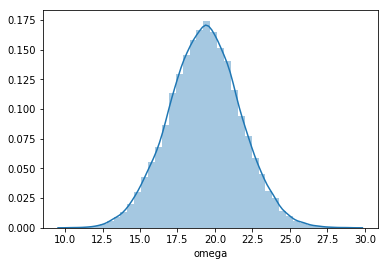

In [3]:
sns.distplot(df["omega"], bins=40)
print(df['omega'].mean())

-1.638279156908665


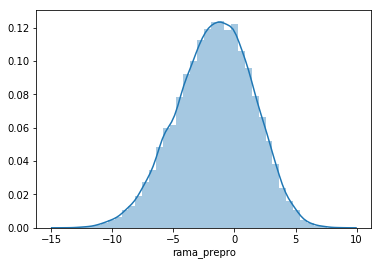

In [4]:
sns.distplot(df["rama_prepro"], bins=40)
print(df['rama_prepro'].mean())

-133.382031225605


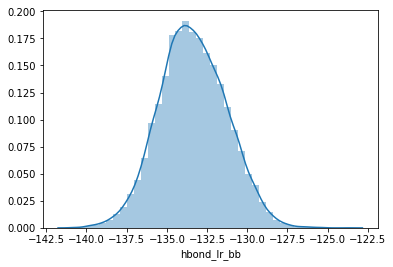

In [5]:
sns.distplot(df["hbond_lr_bb"], bins=40)
print(df['hbond_lr_bb'].mean())

-927.0343163934426


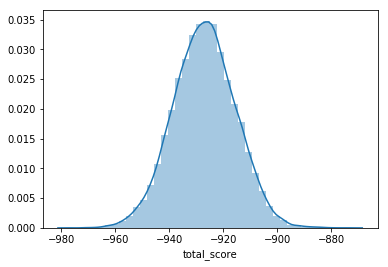

In [6]:
sns.distplot(df["total_score"], bins=40)
print(df['total_score'].mean())

-61.96527482435597


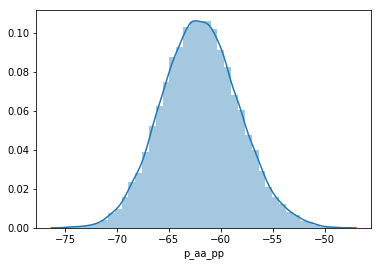

In [7]:
sns.distplot(df["p_aa_pp"], bins=40)
print(df['p_aa_pp'].mean())

In [8]:
for index, row in df.iterrows():
#for model in df.description:
    nets = 0
    model = row["description"]
    HBNet = []
    energy_table = []
    labels = []
    tot_energy = 0
    mean_energy = 0
    tot_hbond = 0
    mean_hbond = 0
    folder_id = "_".join(model.split("_")[0:5]) #+ "_" + model.split("_")[4][3:]
    pdb_file = folder_id + "/" + model + ".pdb"
    with open(pdb_file, 'r') as pdb_f:
        for line in pdb_f:
            if "HBNet" in line:
                HBNet.append(int(line.split()[2]))
            elif line.startswith("label"):
                labels = line.strip().split(' ')
                next(pdb_f)
                next(pdb_f)
                for line in pdb_f:
                    if line.startswith("#END_POSE_ENERGIES_TABLE"):
                        break
                    energy_table.append(line.strip().split(' '))
    de = pd.DataFrame(energy_table, columns=labels)
    de['label'] = de['label'].str.replace('HIS_D', 'HIS')
    new_c = de['label'].str.split('_', expand=True)
    de['resn'] = new_c[1].astype(int)
    HBNet_DE = []
    for item in HBNet:
        if item != 10 and item != 96:
            HBNet_DE.append(item)
        else: 
            nets +=1
    tot_energy = de['total'].loc[de['resn'].isin(HBNet)].astype(float).sum()
    mean_energy = tot_energy/len(HBNet)
    tot_hbond = de['hbond_sc'].loc[de['resn'].isin(HBNet)].astype(float).sum()
    mean_hbond = tot_hbond/len(HBNet)
    tot_energy_DE = de['total'].loc[de['resn'].isin(HBNet_DE)].astype(float).sum()
    mean_energy_DE = tot_energy/len(HBNet_DE)
    tot_hbond_DE = de['hbond_sc'].loc[de['resn'].isin(HBNet_DE)].astype(float).sum()
    mean_hbond_DE = tot_hbond/len(HBNet_DE)
    df.at[index,'tot_energy'] = tot_energy
    df.at[index,'mean_energy'] = mean_energy
    df.at[index,'tot_hbond'] = tot_hbond
    df.at[index,'mean_hbond'] = mean_hbond
    df.at[index,'nHBNet'] = len(HBNet)
    df.at[index,'tot_energy_DE'] = tot_energy_DE
    df.at[index,'mean_energy_DE'] = mean_energy_DE
    df.at[index,'tot_hbond_DE'] = tot_hbond_DE
    df.at[index,'mean_hbond_DE'] = mean_hbond_DE
print(df)
                

       index  SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0          0  SCORE:     -922.850               0.0                 0.000   
1          1  SCORE:     -924.600               0.0                 0.000   
2          2  SCORE:     -920.594               0.0                 0.002   
3          3  SCORE:     -925.659               0.0                 0.000   
4          4  SCORE:     -916.110               0.0                 0.000   
5          5  SCORE:     -913.827               0.0                 0.000   
6          6  SCORE:     -920.190               0.0                 0.000   
7          7  SCORE:     -924.887               0.0                 0.000   
8          8  SCORE:     -933.922               0.0                 0.000   
9          9  SCORE:     -925.918               0.0                 0.000   
10         0  SCORE:     -932.091               0.0                 0.000   
11         1  SCORE:     -930.755               0.0                 0.000   

-28.671986328649496


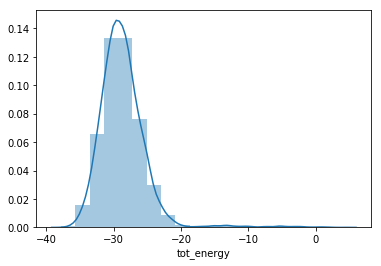

In [9]:
sns.distplot(df["tot_energy"], bins=20)
print(df['tot_energy'].mean())

-7.167996582162374


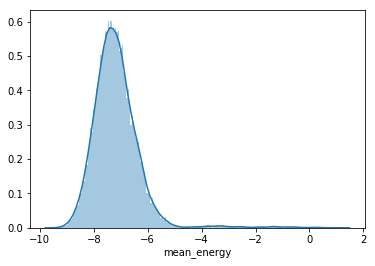

In [10]:
sns.distplot(df["mean_energy"], bins=200)
print(df['mean_energy'].mean())

-4.372694706869633


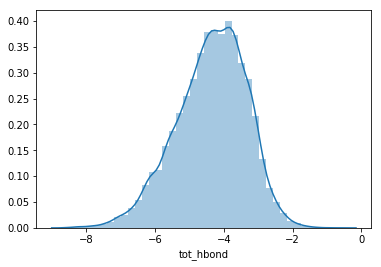

In [11]:
sns.distplot(df["tot_hbond"], bins=40)
print(df['tot_hbond'].mean())

-1.0931736767174083


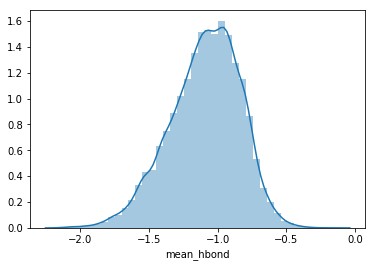

In [12]:
sns.distplot(df["mean_hbond"], bins=40)
print(df['mean_hbond'].mean())

-14.915811909445745


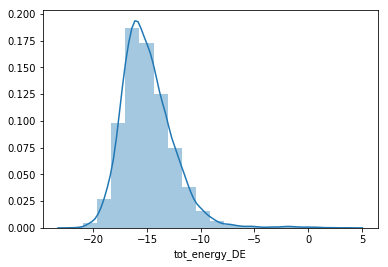

In [13]:
sns.distplot(df["tot_energy_DE"], bins=20)
print(df['tot_energy_DE'].mean())

-14.335993164324748


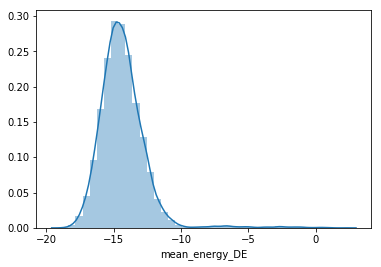

In [14]:
sns.distplot(df["mean_energy_DE"], bins=40)
print(df['mean_energy_DE'].mean())

-2.478778268149883


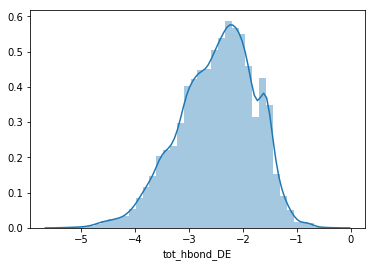

In [15]:
sns.distplot(df["tot_hbond_DE"], bins=40)
print(df['tot_hbond_DE'].mean())

-2.1863473534348166


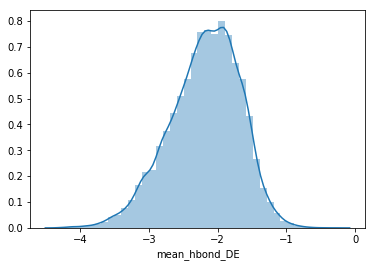

In [16]:
sns.distplot(df["mean_hbond_DE"], bins=40)
print(df['mean_hbond_DE'].mean())

# In terms of mean_energy, it does not really matter if we consider the full motif or the DE only. mean_energy_DE would only allow keeping a few of exta points along the secondary correlation line. It does not correlate with omega, rama_prepro or hbond_lr_bb.

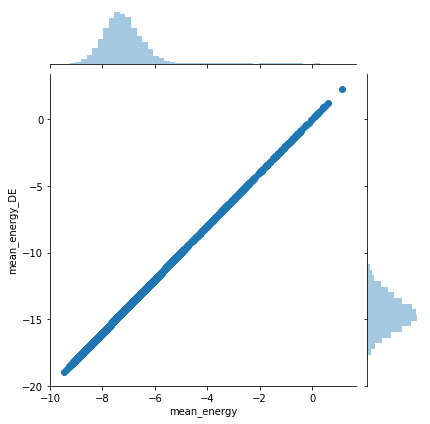

In [17]:
sns.jointplot("mean_energy", "mean_energy_DE", df);

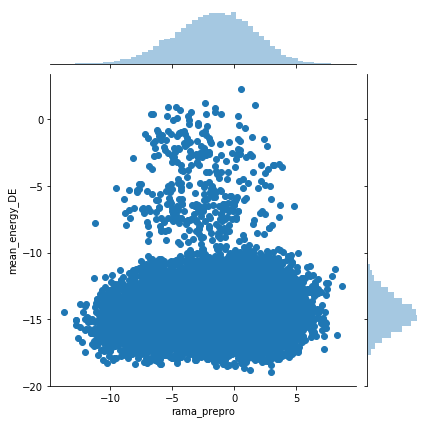

In [18]:
sns.jointplot("rama_prepro", "mean_energy_DE", df);

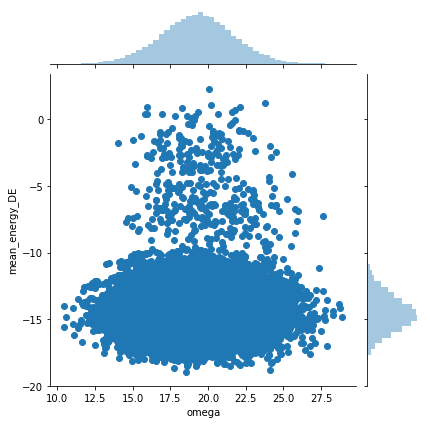

In [19]:
sns.jointplot("omega", "mean_energy_DE", df);

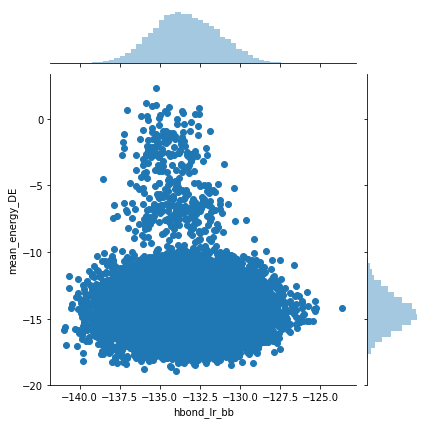

In [20]:
sns.jointplot("hbond_lr_bb", "mean_energy_DE", df);

# The cutoff of -1.8 mean_hbond_DE is more intuitive and will help keeping the variants along the secondary correlation axis. It does not correlate with omega, rama_prepro of hbond_lr_bb

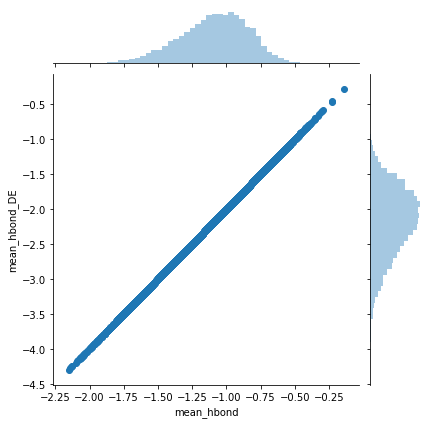

In [21]:
sns.jointplot("mean_hbond", "mean_hbond_DE", df);

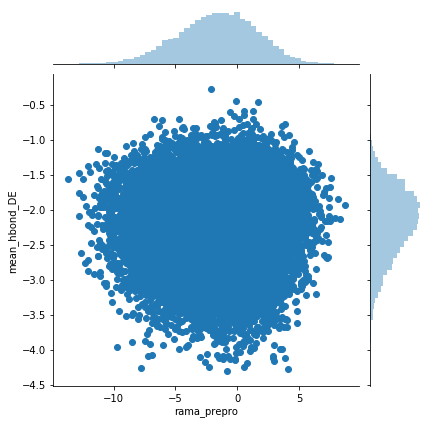

In [22]:
sns.jointplot("rama_prepro", "mean_hbond_DE", df);

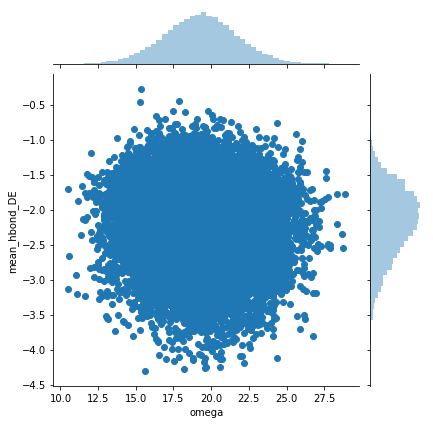

In [23]:
sns.jointplot("omega", "mean_hbond_DE", df);

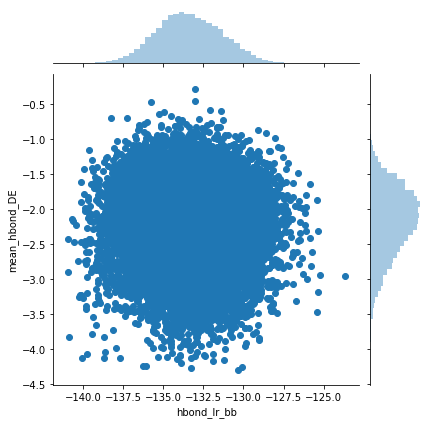

In [24]:
sns.jointplot("hbond_lr_bb", "mean_hbond_DE", df);

In [39]:
df.loc[(df['hbond_lr_bb']<-130)& (df['omega']<=19.3) & (df['mean_energy_DE']<-14.2) &(df['mean_energy']<-7.1) & (df['rama_prepro']<=-1.0)]# & (df['mean_energy_DE']<-10) & (df['rama_prepro']<=-5) ].shape


,index,SCORE:,total_score,angle_constraint,atom_pair_constraint,dihedral_constraint,dslf_fa13,fa_atr,fa_dun,fa_elec,...,description,tot_energy,mean_energy,tot_hbond,mean_hbond,nHBNet,tot_energy_DE,mean_energy_DE,tot_hbond_DE,mean_hbond_DE
0,0,SCORE:,-922.850,0.0,0.000,0.518,0.0,-931.929,204.565,-718.302,...,89_input_0033_0004_9_0001,-29.30990,-7.327475,-4.91333,-1.228333,4.0,-17.12768,-14.654950,-3.31930,-2.456665
4,4,SCORE:,-916.110,0.0,0.000,0.472,0.0,-934.849,194.747,-669.663,...,89_input_0033_0004_9_0005,-32.06641,-8.016603,-7.02173,-1.755432,4.0,-18.79147,-16.033205,-4.40971,-3.510865
12,2,SCORE:,-934.119,0.0,0.000,0.490,0.0,-944.157,219.833,-714.043,...,64_input_0084_0001_12_0003,-31.28332,-7.820830,-4.70643,-1.176608,4.0,-17.47137,-15.641660,-3.09173,-2.353215
13,3,SCORE:,-933.254,0.0,0.000,0.625,0.0,-955.989,207.655,-681.191,...,64_input_0084_0001_12_0004,-30.50859,-7.627147,-5.70251,-1.425628,4.0,-15.44510,-15.254295,-3.18230,-2.851255
15,5,SCORE:,-913.498,0.0,0.000,0.342,0.0,-947.745,201.730,-649.506,...,64_input_0084_0001_12_0006,-33.85367,-8.463418,-6.12691,-1.531728,4.0,-16.89141,-16.926835,-3.57481,-3.063455
32,2,SCORE:,-904.975,0.0,0.001,0.193,0.0,-970.697,205.254,-648.571,...,60_input_0013_0003_11_0003,-30.70967,-7.677417,-5.46063,-1.365158,4.0,-17.48224,-15.354835,-2.72842,-2.730315
33,3,SCORE:,-905.342,0.0,0.015,0.300,0.0,-965.547,210.007,-642.111,...,60_input_0013_0003_11_0004,-31.87009,-7.967522,-7.09710,-1.774275,4.0,-15.85906,-15.935045,-3.45583,-3.548550
37,7,SCORE:,-908.369,0.0,0.016,0.248,0.0,-985.236,204.756,-636.085,...,60_input_0013_0003_11_0008,-32.46625,-8.116563,-4.13703,-1.034258,4.0,-18.01471,-16.233125,-2.60185,-2.068515
66,6,SCORE:,-939.422,0.0,0.000,0.483,0.0,-987.077,204.397,-653.201,...,82_input_0015_0001_5_0007,-30.75163,-7.687908,-5.57332,-1.393330,4.0,-12.74670,-15.375815,-3.07469,-2.786660
67,7,SCORE:,-950.643,0.0,0.000,0.443,0.0,-989.449,209.054,-677.011,...,82_input_0015_0001_5_0008,-34.79408,-8.698520,-5.44236,-1.360590,4.0,-17.78958,-17.397040,-3.09923,-2.721180


In [40]:
df.loc[df['mean_hbond_DE']<-1.8].shape

(19551, 35)

In [41]:
best_motif =df.loc[(df['hbond_lr_bb']<-130)& (df['omega']<=19.3) & (df['mean_energy_DE']<-14.2) &(df['mean_energy']<-7.1) & (df['rama_prepro']<=-1.0)]# & (df['mean_energy_DE']<-10) & (df['rama_prepro']<=-5) ].shape


In [42]:
#best_motif = df.loc[(df['mean_hbond_DE']<-1.8) & (df['mean_energy_DE']<-10) & (df['omega']<=18) & (df['rama_prepro']<=-5) & (df['hbond_lr_bb']<=-127.5)]
for model in best_motif.description:
    folder_id = "_".join(model.split("_")[0:5])
    source = folder_id + "/" + model + ".pdb"
    target = "../round2_surf_B/" + model + ".pdb"
    copyfile(source, target)

16.55983042394015


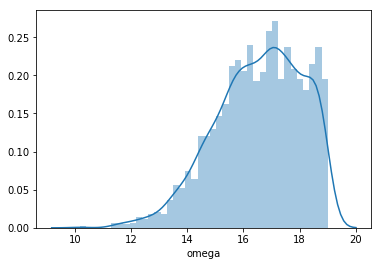

In [42]:
sns.distplot(best_motif["omega"], bins=40)
print(best_motif['omega'].mean())

15.03010174563591


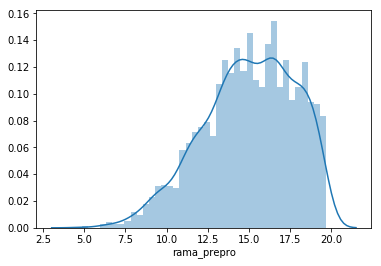

In [43]:
sns.distplot(best_motif["rama_prepro"], bins=40)
print(best_motif['rama_prepro'].mean())

-124.71991471321697


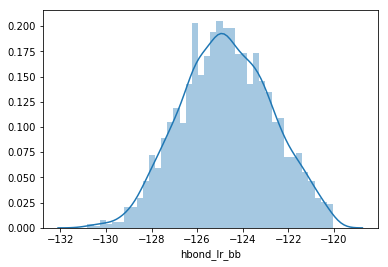

In [44]:
sns.distplot(best_motif["hbond_lr_bb"], bins=40)
print(best_motif['hbond_lr_bb'].mean())

In [47]:
df.loc[(df['mean_hbond_DE']>-1.2) & (df['mean_energy_DE']>-10)].shape

(868, 35)

In [49]:
worst_motif = df.loc[(df['mean_hbond_DE']>-1.2) & (df['mean_energy_DE']>-10)]
for model in worst_motif.description:
    folder_id = "_".join(model.split("_")[0:5])
    source = folder_id + "/" + model + ".pdb"
    target = "worst_motif/" + model + ".pdb"
    copyfile(source, target)